In [1]:
from heapq import heappush, heappop, heapify
from collections import defaultdict
from bitarray import bitarray
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("high_res1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgshape = image.shape
image = np.reshape(image, (1, imgshape[0]*imgshape[1]))
image = image.tolist()[0]

# image = "HAPPY HAPPY"

## Create a library with frequency of each symbol 

(array([4305003., 1183163.,  863071.,  571445.,  582737.,  296110.,
         162949.,  155112.,   96429.,   78381.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

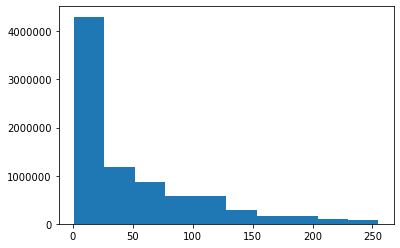

In [3]:
freq_lib = defaultdict(int)    # generate a default library
for ch in image:                # count each letter and record into the frequency library 
    freq_lib[ch] += 1
    
plt.hist(image)

## Create a Huffman Tree 

In [4]:
heap = [[fq, [sym, ""]] for sym, fq in freq_lib.items()]  # '' is for entering the huffman code later
heapify(heap) # transform the list into a heap tree structure

In [5]:
while len(heap) > 1:
    right = heappop(heap)  # heappop - Pop and return the smallest item from the heap
#     print('right = ', right)
    left = heappop(heap)
#     print('left = ', left)

    for pair in right[1:]:  
        pair[1] = '1' + pair[1]   # add one to all the right note
    for pair in left[1:]:  
        pair[1] = '0' + pair[1]   # add zero to all the left note
    heappush(heap, [right[0] + left[0]] + right[1:] + left[1:])  # add values onto the heap. Eg. h = []; heappush(h, (5, 'write code')) --> h = [(5, 'write code')]

In [6]:
huffman_list = right[1:] + left[1:]
# print(huffman_list)
huffman_dict = {a[0]:bitarray(str(a[1])) for a in huffman_list}

## Huffman encoding 

In [7]:
encoded_image = bitarray()
encoded_image.encode(huffman_dict, image)
print(encoded_image)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Save as binary file 

In [8]:
with open('compressed_file.bin', 'wb') as w:
    encoded_image.tofile(w)

## Decoding 

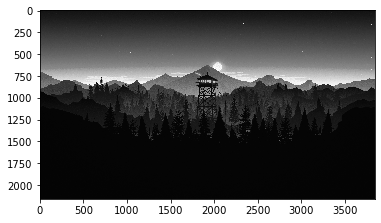

In [9]:
decoded_out = bitarray()

padding = 8 - (len(encoded_image) % 8)

with open('compressed_file.bin', 'rb') as r:
    decoded_out.fromfile(r)

decoded_out = decoded_out[:-padding] # remove padding
decoded_out = decoded_out.decode(huffman_dict) 
# decoded_text = ''.join(decoded_text)

# print(decoded_out)

decoded_out = np.array(decoded_out);
output = np.reshape(decoded_out, (imgshape[0], imgshape[1]))
plt.imshow(output, cmap='gray')

In [10]:
out = len(encoded_image)
out

48546447

In [11]:
im = len(image)*8
im

66355200

In [12]:
compression = 1 - out/im
compression

0.26838519061053245